# ***Libaries***

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten,BatchNormalization,Conv2D,MaxPooling2D,Dropout,Conv1D
from keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import regularizers

# ***Datasets***

In [ ]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

# **Distribution**

In [ ]:
print(X_train.shape , y_train.shape)
print(X_test.shape , y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


# **Visualization**

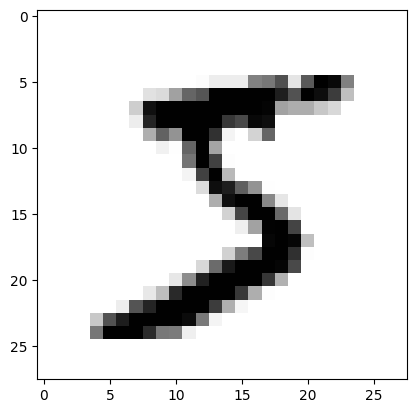

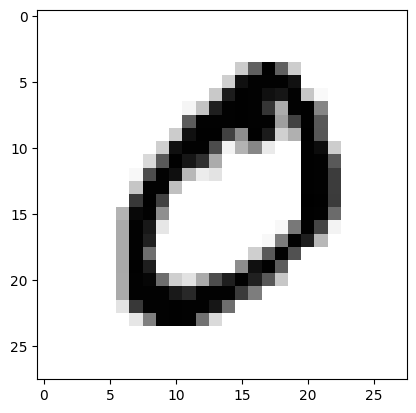

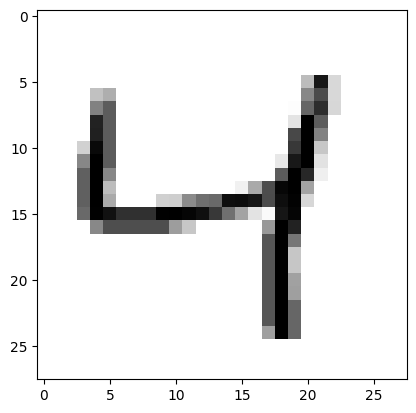

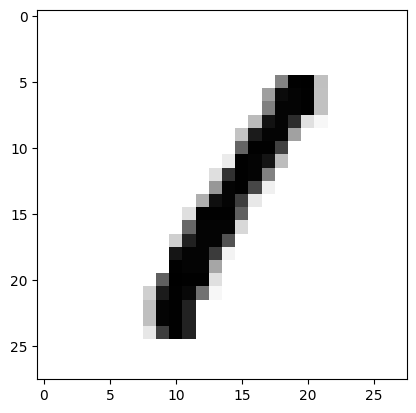

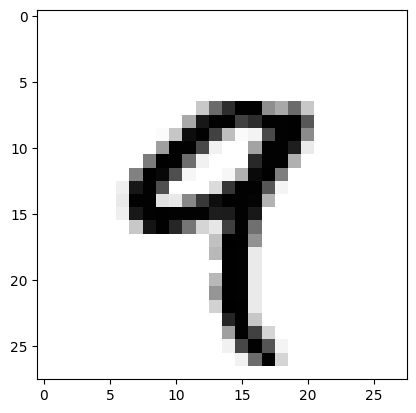

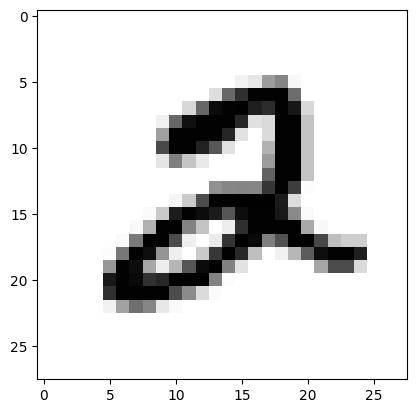

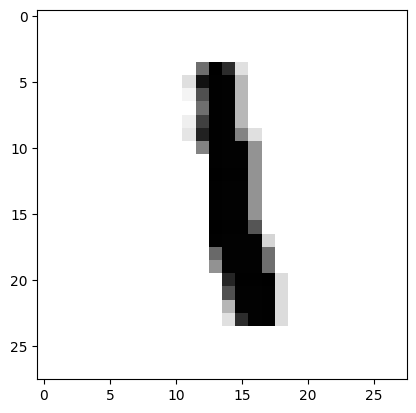

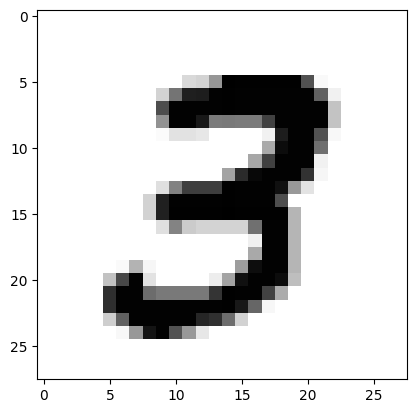

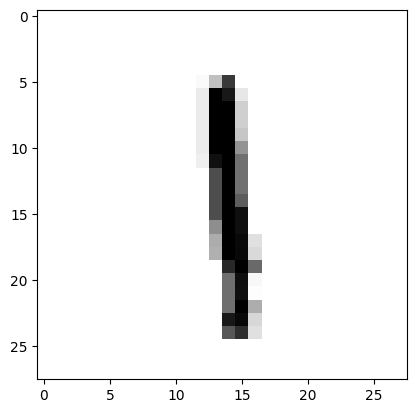

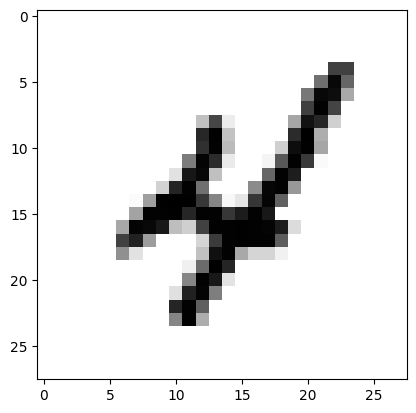

In [ ]:
def plot_digit(i):
  plt.imshow(X_train[i] , cmap="binary")
  plt.show()

for a in range(10):
  plot_digit(a)

# ***Preprocess The Image***

In [ ]:
X_train = X_train.astype(np.float32)/ 255.0
X_test = X_test.astype(np.float32)/ 255.0

In [ ]:
# expand the image to shape (28,28,1)
X_train = np.expand_dims(X_train,-1)
X_test = np.expand_dims(X_test,-1)

In [ ]:
X_test.shape

(10000, 28, 28, 1)

In [ ]:
# convert classes to one hot vector
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [ ]:
print(X_train.shape , y_train.shape)
print(X_test.shape , y_test.shape)

(60000, 28, 28, 1) (60000, 10)
(10000, 28, 28, 1) (10000, 10)


# ***Model Building***

In [ ]:
model = Sequential()

model.add(Conv2D(32,(3,3),activation="relu",input_shape=(28,28,1)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dropout(0.25))
model.add(Dense(10,activation="softmax"))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │        16,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [ ]:
callback = EarlyStopping(monitor="val_loss",patience=4,min_delta=0.01,verbose=1)
modelcheck = ModelCheckpoint("best_model.h5",monitor="val_loss",verbose=1,save_best_only=True)

all = [callback,modelcheck]

# ***Training***

In [ ]:
history = model.fit(X_train,y_train,epochs=50,validation_split=0.3)

Epoch 1/50
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.8594 - loss: 0.4715 - val_accuracy: 0.9768 - val_loss: 0.0783
Epoch 2/50
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.9768 - loss: 0.0787 - val_accuracy: 0.9813 - val_loss: 0.0595
Epoch 3/50
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9824 - loss: 0.0543 - val_accuracy: 0.9841 - val_loss: 0.0514
Epoch 4/50
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9878 - loss: 0.0406 - val_accuracy: 0.9853 - val_loss: 0.0488
Epoch 5/50
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9890 - loss: 0.0365 - val_accuracy: 0.9878 - val_loss: 0.0427
Epoch 6/50
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9899 - loss: 0.0322 - val_accuracy: 0.9894 - val_loss: 0.0370
Epoch 7/50
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9916 - loss: 0.0253 - val_accuracy: 0.9888 - val_loss: 0.0384
Epoch 8/50
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9931 - loss: 0.0223

# ***Evalution***

In [ ]:
score = model.evaluate(X_test,y_test)
print(f"loss is: {score[0]} and accuracy is {score[1]}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9899 - loss: 0.0564
loss is: 0.048816271126270294 and accuracy is 0.9914000034332275


# ***Model Saving***

In [ ]:
model_save = model.save("mnist_model.h5")

In [ ]:
from tensorflow.keras.models import load_model

# Load the old model
model = load_model("mnist_model.h5")

# Save in new format
model.save("mnist_model.keras")

***INSTALL EXTRA***

In [ ]:
!pip install streamlit-drawable-canvas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 24.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 95.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 90.4 MB/s eta 0:00:00
